# Template Matching

In [44]:
import cv2 as cv
import numpy as np
import requests
from matplotlib import pyplot as plt

## Input image and template preparation

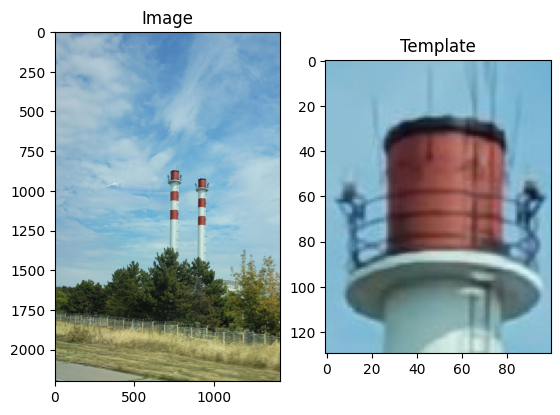

In [35]:
# Image URL
url = "https://d34-a.sdn.cz/d_34/c_img_oc_B/nO0bgvR9rXBjevbCPYELW9Y0/6810.jpeg?fl=res,2200,2200,1"

# Download the image
resp = requests.get(url)

img_array = np.frombuffer(resp.content, np.uint8)

# Decode image (OpenCV reads in BGR)
img = cv.imdecode(img_array, cv.IMREAD_COLOR)

# Convert BGR → RGB for Matplotlib
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Manual creation of the template
template = img[850: 980, 700:800]

# Image
plt.subplot(121)
plt.imshow(img)
plt.title("Image")

# Template
plt.subplot(122)
plt.imshow(template)
plt.title("Template")

plt.show()


## Template matching

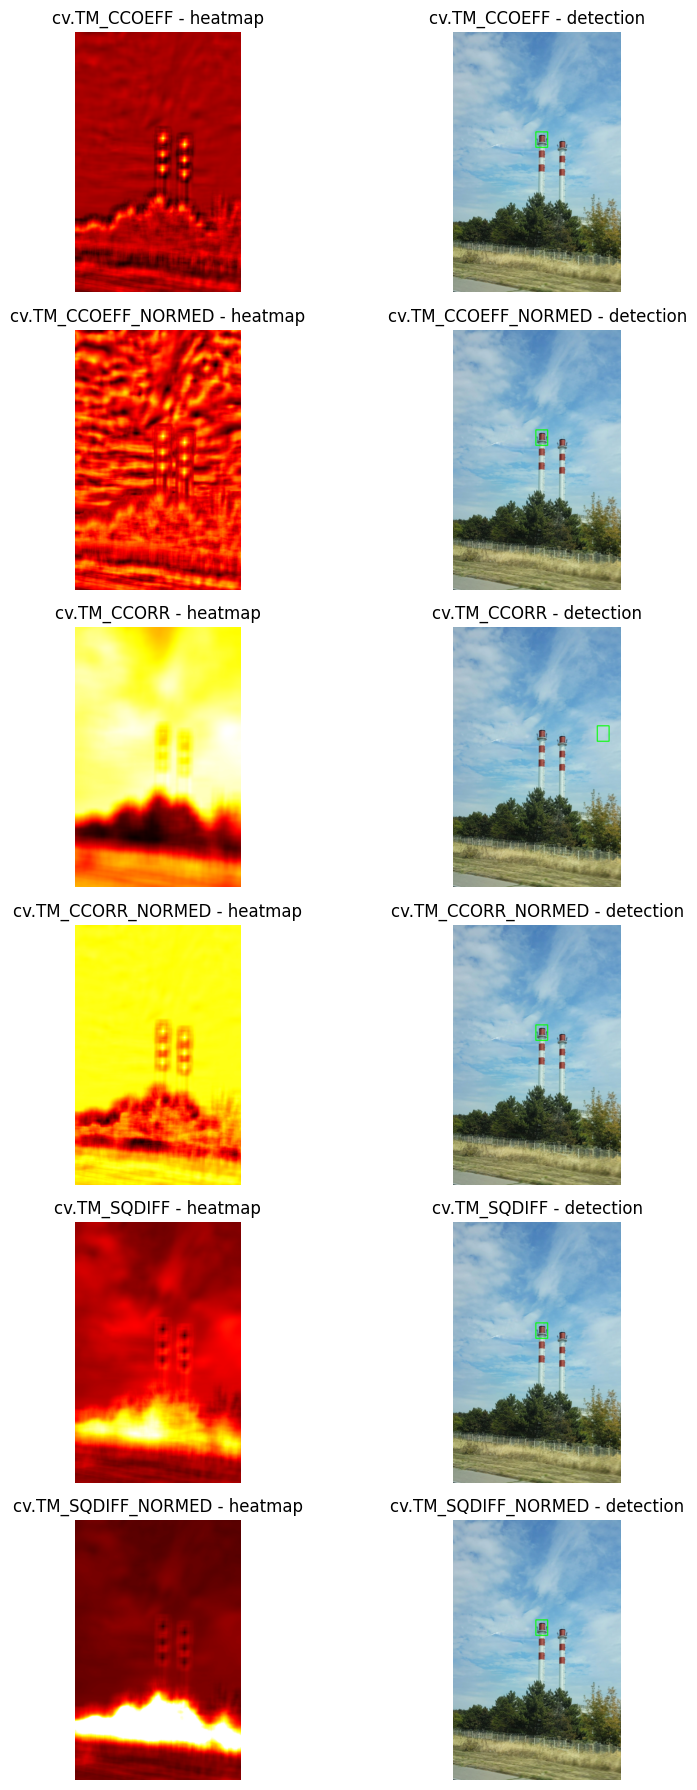

In [43]:
# Convert to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) if img.ndim == 3 else img.copy()
template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY) if template.ndim == 3 else template.copy()
w, h = template_gray.shape[::-1]

# List of OpenCV template matching methods
methods = [
    'cv.TM_CCOEFF',
    'cv.TM_CCOEFF_NORMED',
    'cv.TM_CCORR',
    'cv.TM_CCORR_NORMED',
    'cv.TM_SQDIFF',
    'cv.TM_SQDIFF_NORMED'
]

# Create a figure with 2 columns: heatmap | detection
plt.figure(figsize=(10, 3 * len(methods)))

for i, meth in enumerate(methods):
    method = eval(meth)

    # Apply template matching
    res = cv.matchTemplate(img_gray, template_gray, method)

    # Determine best match
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    top_left = min_loc if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED] else max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw rectangle on a copy of the original image
    img_display = img.copy()
    cv.rectangle(img_display, top_left, bottom_right, (0, 255, 0), 8)

    # Heatmap subplot
    plt.subplot(len(methods), 2, 2*i + 1)
    plt.imshow(res, cmap='hot')
    plt.title(f'{meth} - heatmap')
    plt.axis('off')

    # Detection subplot
    plt.subplot(len(methods), 2, 2*i + 2)
    plt.imshow(img_display)
    plt.title(f'{meth} - detection')
    plt.axis('off')

plt.tight_layout()
plt.show()